In [3]:
#parameters
experimental_data = 'inputs/results.csv'
batch_size = 10

In [10]:
# from summit.strategies import TSEMO
from summit.models import GPyModel
from gp_optimizer import DirectOpt
# from summit.optimizers import EnumerationOptimizer
# from summit.objective import HV
# from summit.domain import *
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
domain = Domain.from_csv('inputs/domain.csv')
previous_results = Results.from_csv('inputs/results.csv', domain)

In [45]:
x = np.linspace(0, 5, 20)
x = np.atleast_2d(x).T
y = -(x-2)**2+np.exp(-x+2)+0.5*np.random.randn(x.shape[0], 1)
m = GPy.models.GPRegression(x, y)

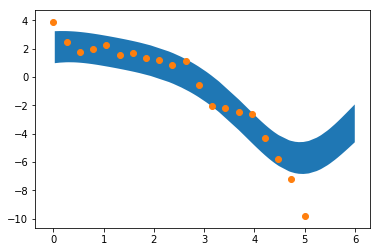

In [46]:
def plot_model(m, xplot):
    xplot = np.sort(xplot, axis=0)
    m_before, v_before = m.predict(xplot)
    upper = m_before+np.sqrt(v_before)
    lower = m_before-np.sqrt(v_before)
    plt.figure()
    plt.fill_between(xplot[:, 0], lower[:, 0], upper[:, 0])
    plt.scatter(x, y)
xplot = np.random.rand(100, 1)*6
plot_model(m, xplot)

In [47]:
bounds = 3*[(0, 1e3)]
m.optimize(DirectOpt(bounds))

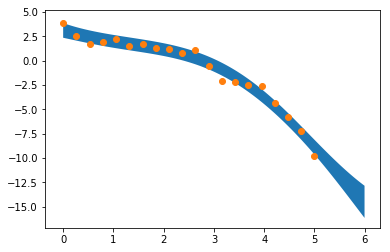

In [48]:
xplot = np.random.rand(1000, 1)*6
plot_model(m, xplot)

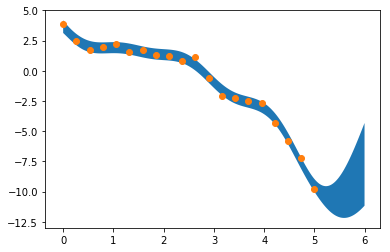

In [49]:
m2 = GPy.models.GPRegression(x, y)
m2.optimize()
plot_model(m2, xplot)

In [ ]:
models = [GPyRegression() for _ in range(2)]
tsemo = TSEMO(domain, models, acquisition, optimizer=EnumerationOptimizer())
design = tsemo.generate_experiments(previous_results, batch_size)

In [ ]:
next_experiment_num = Results.num_batches + 1
design.to_csv(f'outputs/batch_{next_experiment_num}.csv')
tsemo.save_params(f'outputs/{batch}')